<h1 align="center">
Creating corrk tables<br>
    <br>
Atmosphere of CO$_2$, H$_2$, CH$_4$ and variable H$_2$O
</h1>

<h3 align="center"><i>Warning: this script must be run as administrator (on Windows)</i></h3>


In [1]:
import exo_k as xk
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import time,sys,os
import shutil

xk.Settings().set_mks(True)

In [2]:
plt.rcParams["figure.figsize"] = (7,4)
from matplotlib import cycler
colors = cycler('color',[plt.cm.inferno(i) for i in np.linspace(0.1,1,5)])
plt.rc('axes', axisbelow=True, grid=True, labelcolor='dimgray', labelweight='bold', prop_cycle=colors)
plt.rc('grid', linestyle='solid')
plt.rc('xtick', direction='in', color='dimgray')
plt.rc('ytick', direction='in', color='dimgray')
plt.rc('lines', linewidth=1.5)

In [3]:
# Paths

datapath_ktables = 'C:/Users/fxmey/Documents/ENS/STAGE M1/Ktables/'
datapath = 'C:/Users/fxmey/Documents/ENS/STAGE M1/'
datapath_LR = 'C:/Users/fxmey/Documents/ENS/STAGE M1/LR/'

In [4]:
# Folders deletion to avoid errors

# shutil.rmtree("C:/Users/fxmey/Documents/ENS/STAGE M1/LR")
# shutil.rmtree("C:/Users/fxmey/Documents/ENS/STAGE M1/corrk")

In [5]:
fH = 0.14
fG = 0.01
fC = 0.81
fN = 0.04

In [6]:
xk.Settings().set_search_path(datapath_ktables, path_type='ktable')

k_db = xk.Kdatabase(['CO2','CH4','H2O'], '')


Res = 8.5 
wn_grid_IR = xk.wavenumber_grid_R(40., 4000., Res)

Res2 = 13.5 
wn_grid_VI = xk.wavenumber_grid_R(2000., 25000., Res2)

k_db = xk.Kdatabase(['CO2', 'CH4','H2O'], '')
k_db_IR = k_db.bin_down_cp(wnedges=wn_grid_IR, remove_zeros=True)
k_db_VI = k_db.bin_down_cp(wnedges=wn_grid_VI, remove_zeros=True)

Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.
                        You'll need to use bin_down (Ktable) or sample (Xtable)
Careful, not all tables have the same wavelength grid.


## Plotting the data in IR range

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


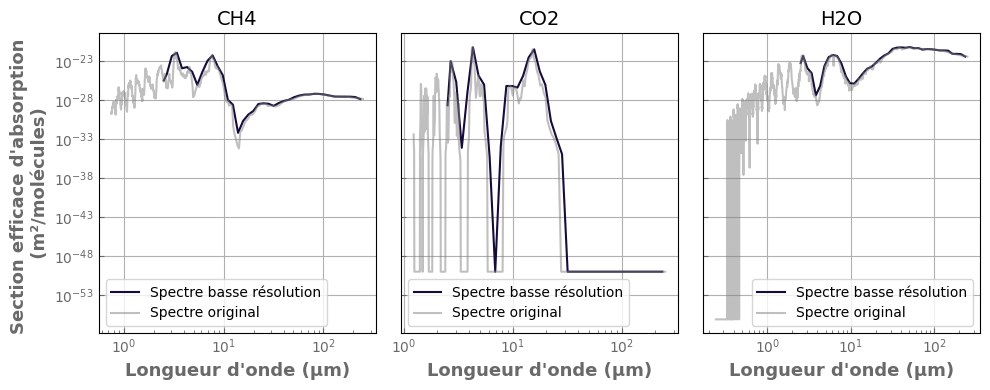

In [7]:
p_plot=2e5
t_plot=300
fig,axs=plt.subplots(1,3,figsize=(10, 4),sharey=True)

k_db_IR['CH4'].plot_spectrum(axs[0],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Spectre basse résolution')
k_db['CH4'].plot_spectrum(axs[0],p=p_plot,t=t_plot,g=1.,label='Spectre original',color='grey',alpha=0.5)
axs[0].legend()
axs[0].set_title('CH4',fontsize=14)
axs[0].set_ylabel(f"Section efficace d'absorption \n (m²/molécules) ", fontsize=13)

k_db_IR['CO2'].plot_spectrum(axs[1],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Spectre basse résolution')
k_db['CO2'].plot_spectrum(axs[1],p=p_plot,t=t_plot,g=1.,label='Spectre original',color='grey',alpha=0.5)
axs[1].legend()
axs[1].set_title('CO2',fontsize=14)
axs[1].set_ylabel("")

k_db_IR['H2O'].plot_spectrum(axs[2],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Spectre basse résolution')
k_db['H2O'].plot_spectrum(axs[2],p=p_plot,t=t_plot,g=1.,label='Spectre original',color='grey',alpha=0.5)
axs[2].legend()
axs[2].set_title('H2O',fontsize=14)
axs[2].set_ylabel("")

for ax in axs:
    ax.set_xlabel("Longueur d'onde (µm)",fontsize=13)

fig.tight_layout()

## Plotting the data in VI range

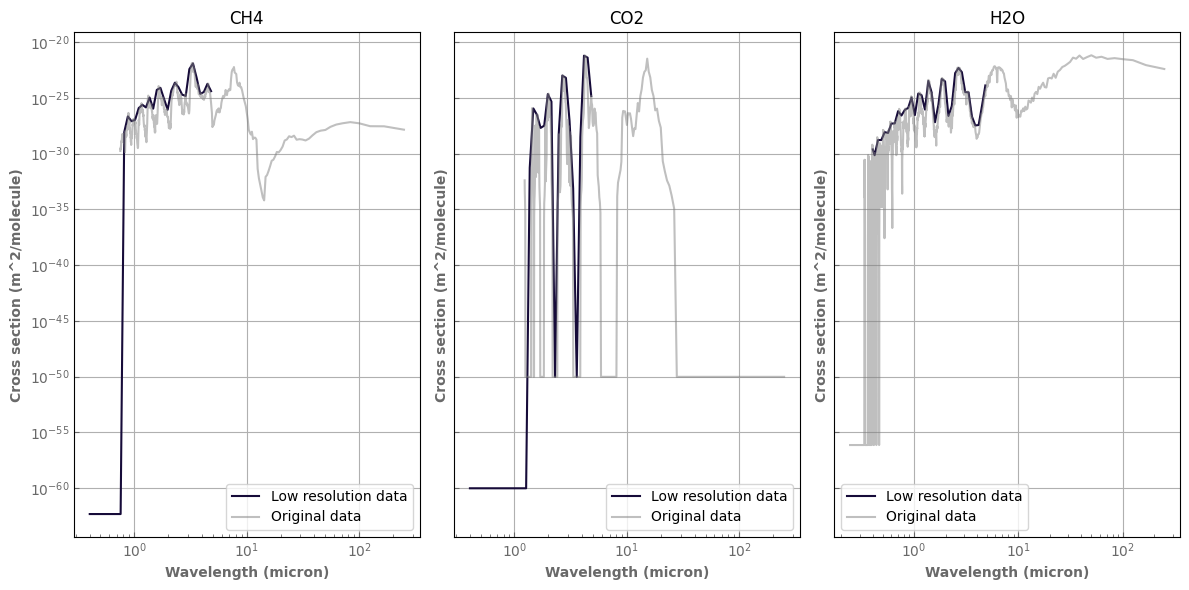

In [8]:
p_plot=2e5
t_plot=300
fig,axs=plt.subplots(1,3,figsize=(12, 6),sharey=True)

k_db_VI['CH4'].plot_spectrum(axs[0],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Low resolution data')
k_db['CH4'].plot_spectrum(axs[0],p=p_plot,t=t_plot,g=1.,label='Original data',color='grey',alpha=0.5)
axs[0].legend()
axs[0].set_title('CH4')

k_db_VI['CO2'].plot_spectrum(axs[1],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Low resolution data')
k_db['CO2'].plot_spectrum(axs[1],p=p_plot,t=t_plot,g=1.,label='Original data',color='grey',alpha=0.5)
axs[1].legend()
axs[1].set_title('CO2')

k_db_VI['H2O'].plot_spectrum(axs[2],p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label='Low resolution data')
k_db['H2O'].plot_spectrum(axs[2],p=p_plot,t=t_plot,g=1.,label='Original data',color='grey',alpha=0.5)
axs[2].legend()
axs[2].set_title('H2O')

fig.tight_layout()

## Creating Low Resolution tables in LowRes repository

In [9]:
# k_db_IR['CO2'].write_hdf5(datapath_LR + 'CO2_IR_LR.ktable.exorem.SI')
# k_db_VI['CO2'].write_hdf5(datapath_LR + 'CO2_VI_LR.ktable.exorem.SI')
# k_db_IR['CH4'].write_hdf5(datapath_LR + 'CH4_IR_LR.ktable.exorem.SI')
# k_db_VI['CH4'].write_hdf5(datapath_LR + 'CH4_VI_LR.ktable.exorem.SI')
# k_db_IR['H2O'].write_hdf5(datapath_LR + 'H2O_IR_LR.ktable.exorem.SI')
# k_db_VI['H2O'].write_hdf5(datapath_LR + 'H2O_VI_LR.ktable.exorem.SI')

## Creating the LMDZ tables for CO$_2$, H$_2$O and CH$_4$

In [10]:
# k_db_IR['CO2'].write_LMDZ(datapath + 'corrk/new_co2_corrk',band='IR')
# k_db_VI['CO2'].write_LMDZ(datapath + 'corrk/new_co2_corrk',band='VI')

# k_db_IR['CH4'].write_LMDZ(datapath + 'corrk/new_ch4_corrk',band='IR')
# k_db_VI['CH4'].write_LMDZ(datapath + 'corrk/new_ch4_corrk',band='VI')

# k_db_IR['H2O'].write_LMDZ(datapath + 'corrk/new_h2o_corrk',band='IR')
# k_db_VI['H2O'].write_LMDZ(datapath + 'corrk/new_h2o_corrk',band='VI')

## Creating the LMDZ table for H$_2$

In [11]:
# VI range
molecs=["H2O"]
suffix= "VI_LR.ktable.exorem.SI.h5"
database= xk.Kdatabase(molecs,suffix, search_path = datapath_LR)

x_array=np.array([1.e-7,1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e-0])
vgas={'H2O':'background'}
bg_gas={"H2O":1e-50}
H2_varH2O_VR=database.create_mix_ktable5d(vgas_comp=vgas,bg_comp=bg_gas,x_array=x_array)

# IR range
molecs1=["H2O"]
suffix1= "IR_LR.ktable.exorem.SI.h5"
database1= xk.Kdatabase(molecs1,suffix1, search_path = datapath_LR)

x_array=np.array([1.e-7,1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e-0])
vgas1={'H2O':'background'}
bg_gas1={"H2O":1e-50}
H2_varH2O_IR=database1.create_mix_ktable5d(vgas_comp=vgas1,bg_comp=bg_gas1,x_array=x_array)

shape of the output Ktable5d (p,t,x,wn,g): [25 15  8 35 16]
shape of the output Ktable5d (p,t,x,wn,g): [25 15  8 40 16]


In [12]:
# Creating the ktable for H2 only no H2O
# IR
molecs3=['H2O']
suffix3='IR_LR.ktable.exorem.SI.h5'
database3=xk.Kdatabase(molecs3,suffix3, search_path = datapath_LR)

composition={'H2O':1e-50}

H2_IR_ktable=database3.create_mix_ktable(composition)

print(H2_IR_ktable.shape)

H2_IR_ktable.write_hdf5(datapath_LR+ 'H2_IR_LR.ktable.exorem.SI')

H2_IR_ktable=xk.Ktable(filename=datapath_LR+'H2_IR_LR.ktable.exorem.SI.h5', remove_zeros=True) 

# VI range

molecs4=['H2O']
suffix4='VI_LR.ktable.exorem.SI.h5'
database4=xk.Kdatabase(molecs4,suffix4, search_path = datapath_LR)

composition={'H2O':1e-50}

H2_VI_ktable=database4.create_mix_ktable(composition)

H2_VI_ktable.write_hdf5(datapath_LR + 'H2_VI_LR.ktable.exorem.SI')

H2_VI_ktable=xk.Ktable(filename=datapath_LR+'H2_VI_LR.ktable.exorem.SI.h5', remove_zeros=True) 

print(H2_VI_ktable.shape)

[25 15 40 16]
[25 15 35 16]


## Creating the LMDZ tables for fixed ratios of CH$_4$, CO$_2$, H$_2$ and N$_2$ and variable H$_2$O

In [13]:
#IR range
molecs5=['CO2','CH4','H2','H2O']
suffix5='IR_LR.ktable.exorem.SI.h5'

database5=xk.Kdatabase(molecs5,suffix5,search_path = datapath_LR)
x_array=np.array([1e-50,1.e-7,1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2])
vgas5={'H2O':'background'}
bg_gas5={'CO2':fC,'N2':'background','CH4':fG,'H2':fH}
mix_var_gas5_IR=database5.create_mix_ktable5d(vgas_comp=vgas5,bg_comp=bg_gas5,x_array=x_array)

#VI range
molecs6=['CO2','CH4','H2','H2O']
suffix6='VI_LR.ktable.exorem.SI.h5'

database6=xk.Kdatabase(molecs6,suffix6,search_path = datapath_LR)
x_array=np.array([1e-50,1.e-7,1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2])
vgas6={'H2O':'background'}
bg_gas6={'CO2':fC,'N2':'background','CH4':fG,'H2':fH}
mix_var_gas6_VI=database6.create_mix_ktable5d(vgas_comp=vgas6,bg_comp=bg_gas6,x_array=x_array)

shape of the output Ktable5d (p,t,x,wn,g): [25 15  7 40 16]
shape of the output Ktable5d (p,t,x,wn,g): [25 15  7 35 16]


In [14]:
# mix_var_gas5_IR.write_LMDZ(datapath + 'corrk/early_mars_h2_co2_ch4_n2_varh2o',band='IR')
# mix_var_gas6_VI.write_LMDZ(datapath + 'corrk/early_mars_h2_co2_ch4_n2_varh2o',band='VI')

# xk.finalize_LMDZ_dir(datapath + 'corrk/early_mars_h2_co2_ch4_n2_varh2o',mix_var_gas5_IR.Nw,mix_var_gas6_VI.Nw)

In [15]:
# mix_var_gas5_IR

## Plotting mixed corrk table

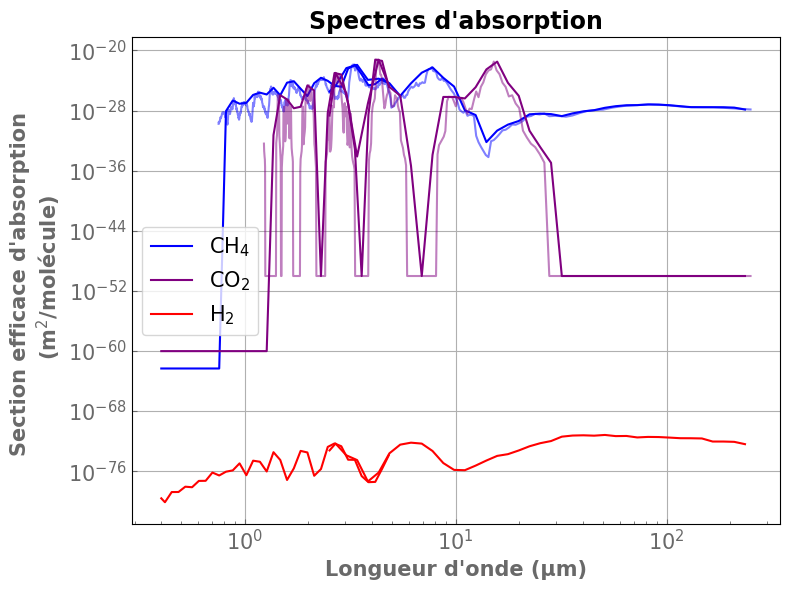

In [16]:
p_plot=2e5
t_plot=300
fig,axs=plt.subplots(1,1,figsize=(8,6))

k_db_VI['CH4'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label=r'CH$_4$',color='blue')
k_db_IR['CH4'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',color='blue')
k_db['CH4'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,color='blue',alpha=0.5)


k_db_VI['CO2'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label=r'CO$_2$',color='purple')
k_db_IR['CO2'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',color='purple')
k_db['CO2'].plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,color='purple',alpha=0.5)

H2_IR_ktable.plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',label=r'H$_2$',color='red')
H2_VI_ktable.plot_spectrum(axs,p=p_plot,t=t_plot,g=1.,yscale='log',xscale='log',color="red")

axs.legend(fontsize=15)
axs.set_xlabel("Longueur d'onde (µm)",fontsize=15)
axs.set_ylabel(f"Section efficace d'absorption \n (m$^2$/molécule)",fontsize=15)
axs.set_title("Spectres d'absorption",fontsize=17,weight='bold')
plt.tick_params(axis='both', labelsize=15)
fig.tight_layout()

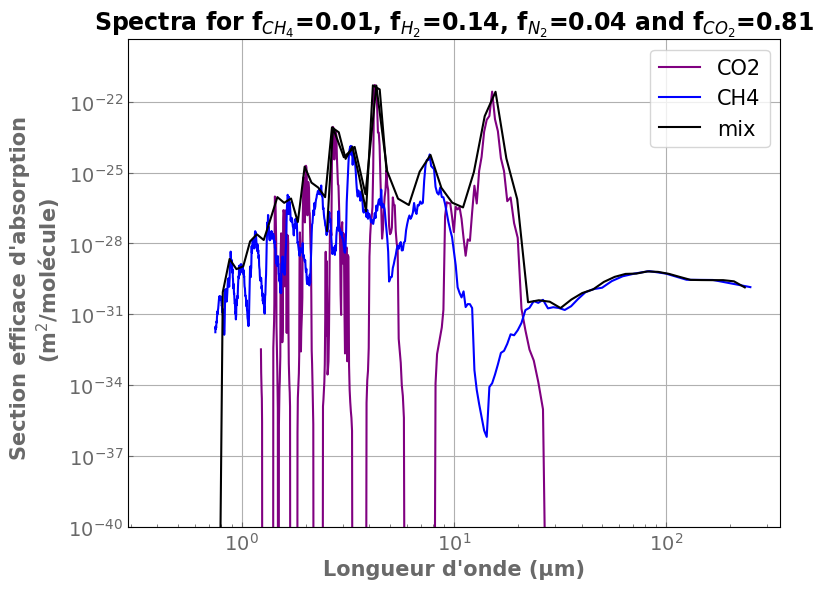

In [17]:
ptest=2e5
ttest=300

fig,axs=plt.subplots(1,1,figsize=(8,6))
# k_db['H2O'].plot_spectrum(axs,p=ptest,t=ttest,g=1.,x=1e-50,label='H2O',color='gold',yscale='log',xscale='log')
k_db['CO2'].plot_spectrum(axs,p=ptest,t=ttest,g=1.,x=fC,label='CO2',color='purple')
if fG > 0: k_db['CH4'].plot_spectrum(axs,p=ptest,t=ttest,g=1.,x=fG,label='CH4',color='blue')
# H2_VI_ktable.plot_spectrum(axs,p=ptest,t=ttest,g=1.,x=fH,label='H2',color='red')
# H2_IR_ktable.plot_spectrum(axs,p=ptest,t=ttest,g=1.,x=fH,color='red')
mix_var_gas5_IR.plot_spectrum(axs,p=ptest,t=ttest,x=1e-50,g=1.,label='mix',yscale='log',xscale='log',color='black')
mix_var_gas6_VI.plot_spectrum(axs,p=ptest,t=ttest,x=1e-50,g=1.,yscale='log',xscale='log',color='black')

axs.set_xlabel("Longueur d'onde (µm)",fontsize=15)
axs.set_ylabel(f"Section efficace d'absorption \n (m$^2$/molécule)",fontsize=15)
axs.set_ylim(bottom=1.e-40)
axs.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=14)
axs.set_title(rf'Spectra for f$_{{CH_4}}$={fG}, f$_{{H_2}}$={fH}, f$_{{N_2}}$={fN} and f$_{{CO_2}}$={fC}',fontsize=17,weight='bold')
fig.tight_layout()
plt.savefig('Spectra.png')

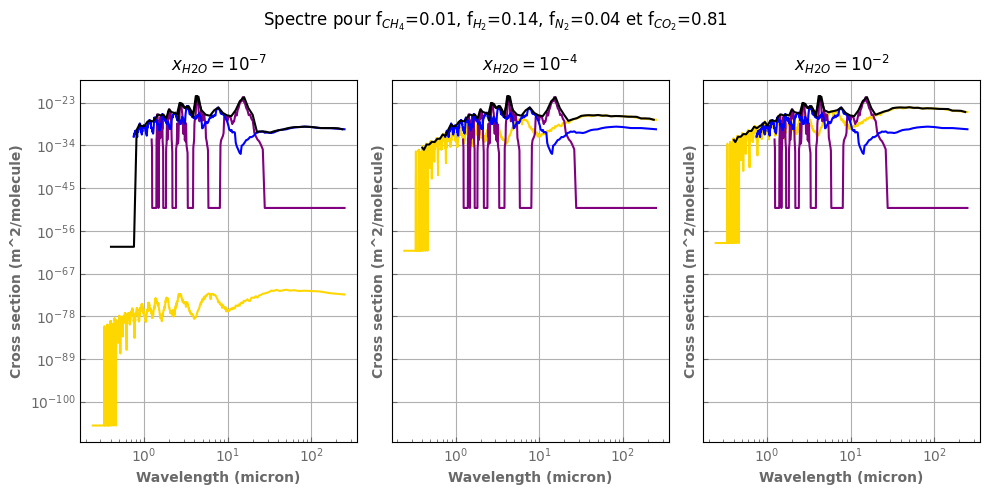

In [18]:
ptest=2e5
ttest=300

fig,axs=plt.subplots(1,3,sharex=False,sharey=True,figsize=(10,5))
k_db['H2O'].plot_spectrum(axs[0],p=ptest,t=ttest,g=1.,x=1e-50,label='H2O',color='gold',yscale='log',xscale='log')
k_db['CO2'].plot_spectrum(axs[0],p=ptest,t=ttest,g=1.,x=fC,label='CO2',color='purple')
if fG > 0: k_db['CH4'].plot_spectrum(axs[0],p=ptest,t=ttest,g=1.,x=fG,label='CH4',color='blue')
# H2_VI_ktable.plot_spectrum(axs[0],p=ptest,t=ttest,g=1.,x=fH,label='H2',color='red')
# H2_IR_ktable.plot_spectrum(axs[0],p=ptest,t=ttest,g=1.,x=fH,color='red')
mix_var_gas5_IR.plot_spectrum(axs[0],p=ptest,t=ttest,x=1e-50,g=1.,label='mix',yscale='log',xscale='log',color='black')
mix_var_gas6_VI.plot_spectrum(axs[0],p=ptest,t=ttest,x=1e-50,g=1.,yscale='log',xscale='log',color='black')

k_db['H2O'].plot_spectrum(axs[1],p=ptest,t=ttest,g=1.,x=x_array[3],label='H2O',color='gold',yscale='log',xscale='log')
k_db['CO2'].plot_spectrum(axs[1],p=ptest,t=ttest,g=1.,x=fC,label='CO2',color='purple')
if fG > 0: k_db['CH4'].plot_spectrum(axs[1],p=ptest,t=ttest,g=1.,x=fG,label='CH4',color='blue')
# H2_VI_ktable.plot_spectrum(axs[1],p=ptest,t=ttest,g=1.,x=fH,label='H2',color='red')
# H2_IR_ktable.plot_spectrum(axs[1],p=ptest,t=ttest,g=1.,x=fH,color='red')
mix_var_gas5_IR.plot_spectrum(axs[1],p=ptest,t=ttest,x=x_array[3],g=1.,label='mix',yscale='log',xscale='log',color='black')
mix_var_gas6_VI.plot_spectrum(axs[1],p=ptest,t=ttest,x=x_array[3],g=1.,yscale='log',xscale='log',color='black')

k_db['H2O'].plot_spectrum(axs[2],p=ptest,t=ttest,g=1.,x=x_array[5],label='H2O',color='gold',yscale='log',xscale='log')
k_db['CO2'].plot_spectrum(axs[2],p=ptest,t=ttest,g=1.,x=fC,label='CO2',color='purple')
if fG > 0: k_db['CH4'].plot_spectrum(axs[2],p=ptest,t=ttest,g=1.,x=fG,label='CH4',color='blue')
# H2_VI_ktable.plot_spectrum(axs[2],p=ptest,t=ttest,g=1.,x=fH,label='H2',color='red')
# H2_IR_ktable.plot_spectrum(axs[2],p=ptest,t=ttest,g=1.,x=fH,color='red')
mix_var_gas5_IR.plot_spectrum(axs[2],p=ptest,t=ttest,x=x_array[5],g=1.,label='mix',yscale='log',xscale='log',color='black')
mix_var_gas6_VI.plot_spectrum(axs[2],p=ptest,t=ttest,x=x_array[5],g=1.,yscale='log',xscale='log',color='black')

axs[0].set_title('$x_{H2O}=10^{-7}$')
axs[1].set_title('$x_{H2O}=10^{-4}$')
axs[2].set_title('$x_{H2O}=10^{-2}$')
# for ax in axs :
#     ax.set_ylim(bottom=1.e-40)
#     ax.legend()

fig.suptitle(rf'Spectre pour f$_{{CH_4}}$={fG}, f$_{{H_2}}$={fH}, f$_{{N_2}}$={fN} et f$_{{CO_2}}$={fC}')
fig.tight_layout()